In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import tensorflow as tf

import os
import pickle
import numpy as np

print(tf.__version__)
print(keras.__version__)

1.1.0
2.0.8


In [8]:
num_examples_per_class = 5000

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage',
           'barn','baseball bat','baseball','basket','basketball','bathtub','beach','bear','beard','bed',
           'bee','belt','bicycle','binoculars','birthday cake','blueberry','book','boomerang','bottlecap','bowtie',
           'bracelet','brain','bread','broom','bulldozer','bus','bush','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot',
           'cello','computer','cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch',
           'cow','crab','crayon','crocodile','crown','cup','diamond','dog','dolphin','donut',
           'dragon','dresser','drill','drums','duck','dumbbell','ear','elbow','elephant','envelope',
           'eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant','fireplace',
           'firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer','foot','fork']

num_classes = len(classes)

## Load the dataset

In [ ]:
quickdraws = [np.load("../../data/{}.npy".format(qdraw))[:num_examples_per_class] for qdraw in classes]

# Concat the arrays together
x_data = np.concatenate(quickdraws)

In [38]:
# Load data here
x_data = np.load("./data/quickdraw/x_data_100_classes_5k.npy")

x_data = x_data.reshape(x_data.shape[0], 28, 28, 1)
x_data = x_data.astype('float32')
x_data /= 255

print(x_data.shape)

labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]

# Concat the arrays together
y_data = np.concatenate(labels)
y_data = keras.utils.to_categorical(y_data, num_classes)

print(y_data.shape)

# Partition data into training set and validation set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

(500000, 28, 28, 1)
(500000, 100)


## Create Model

In [39]:
Inp = Input(shape=(28, 28, 1))
# Convolution block 1
x = Conv2D(32, kernel_size=(3, 3), activation='relu', name='Conv_01')(Inp)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', name='Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2), name='MaxPool_01')(x)
x = Dropout(0.25, name='Dropout_01')(x)
# Convolution block 2
x = Conv2D(64, kernel_size=(3, 3), activation='relu', name='Conv_03')(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', name='Conv_04')(x)
x = MaxPooling2D(pool_size=(2, 2), name='MaxPool_02')(x)
x = Dropout(0.5, name='Dropout_02')(x)

x = Flatten(name='Flatten_01')(x)
x = Dense(256, activation='relu', name='Dense_01')(x)
x = Dropout(0.5, name='Dropout_03')(x)
output = Dense(num_classes, activation='softmax', name='Dense_02')(x)

In [40]:
# Define model inputs and output
model = Model(Inp, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 32)        9248      
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        18496     
_________________________________________________________________
Conv_04 (Conv2D)             (None, 8, 8, 64)          36928     
__________

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

In [42]:
batch_size = 128
epochs = 10

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 [==============================] - 46s - loss: 2.3071 - acc: 0.4340 - val_loss: 1.3623 - val_acc: 0.6623
Epoch 2/10
400000/400000 [==============================] - 45s - loss: 1.6871 - acc: 0.5730 - val_loss: 1.1953 - val_acc: 0.7026
Epoch 3/10
400000/400000 [==============================] - 45s - loss: 1.5546 - acc: 0.6050 - val_loss: 1.1164 - val_acc: 0.7200
Epoch 4/10
400000/400000 [==============================] - 45s - loss: 1.4896 - acc: 0.6219 - val_loss: 1.0853 - val_acc: 0.7269
Epoch 5/10
400000/400000 [==============================] - 49s - loss: 1.4471 - acc: 0.6322 - val_loss: 1.0560 - val_acc: 0.7357
Epoch 6/10
400000/400000 [==============================] - 49s - loss: 1.4153 - acc: 0.6402 - val_loss: 1.0462 - val_acc: 0.7408
Epoch 7/10
400000/400000 [==============================] - 49s - loss: 1.3915 - acc: 0.6448 - val_loss: 1.0200 - val_acc: 0.7446
Epoch 8/10
400000/400000 [============

In [43]:
# Evaluate model with test data set and share sample prediction results
evaluation = model.evaluate(x_test, y_test,
          batch_size=batch_size)
print('Model Accuracy = %.2f' % (evaluation[1]))
print('Model Loss = %.2f' % (evaluation[0]))

 98944/100000 [============================>.] - ETA: 0sModel Accuracy = 0.75
Model Loss = 0.98


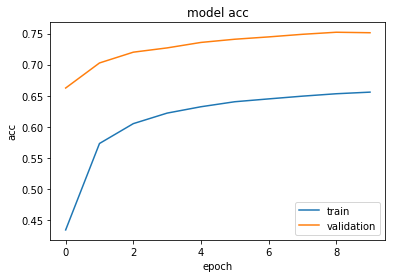

In [44]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    
plot_train(hist)

In [45]:
model.save('mini_challenge_01.h5')

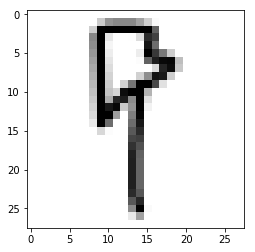

Actual Label: 7, Predicted Label: 7


In [46]:
predict_data = x_test
index = 2

def show_image(data):
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(data.reshape(28, 28), cmap='gray_r')
    plt.show()

show_image(predict_data[index])

preds = model.predict(predict_data)

print('Actual Label: %s, Predicted Label: %s' % (np.argmax(y_test[index]), np.argmax(preds[index])))